In [347]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
# Load the CSV file from the data folder into a DataFrame
main_df = pd.read_csv("data/diabetes_dataset.csv")

# Display the first few rows of the DataFrame
main_df.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [349]:
# Identify all columns

main_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [350]:
# Dropping the following colums due to low correlation (below 10%) with the Target column
# Fruits (Eats fruit at least once a day)
# GenHlth (Perception of own health)
# Access to any type of Health Insurance
# NoDocbcCost (Did not seek medical attention due to Financial Issues)
# Sex (Gender of person)
# CholCheck (Check Cholesterol Levels at least once within the last 5 years)
# Veggies (Eats veggies at least once a day)
# HvyAlcoholConsump (Male > 14 drinks per week, Female > 7 drinks per week)
# MentHlth (Amount of days in the last 30 with perceived "negative mental health")
# Smoker (Binary, having smoked at least 100 cigs in their life)

main_df = main_df.drop(columns=['Fruits', 'GenHlth','AnyHealthcare','NoDocbcCost','Sex','CholCheck','Veggies','HvyAlcoholConsump','MentHlth','Smoker'])
main_df = main_df[main_df["Diabetes_012"] != 1]

In [351]:
# Identify all data types

main_df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
BMI                     float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
PhysHlth                float64
DiffWalk                float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [352]:
# Checking for null values

main_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64

In [353]:
# Selecting all columns EXCEPT our target column as features of the model

features = main_df.drop(columns=['Diabetes_012'])

In [354]:
# Defining the target column, as in, what do we want the model to predict

target = main_df["Diabetes_012"]

In [355]:
# Setting up the model conditons

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [356]:
## The code below takes all numerical (>3) columns and normalizes them, in order to avoid range distortion

# Identify columns with a maximum value above 3
columns_to_normalize = [col for col in main_df.columns if main_df[col].max() > 3]

In [357]:
# Initialize scaler and fit only on training data
scaler = MinMaxScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

In [358]:
# Apply the scaler transformation to the test data
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

In [359]:
# Checking results of the previous code

X_train.head(3)

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,PhysHlth,DiffWalk,Age,Education,Income
175718,1.0,1.0,0.151163,0.0,0.0,0.0,0.5,1.0,1.000000,0.8,0.857143
179395,1.0,1.0,0.232558,0.0,0.0,0.0,0.1,0.0,0.583333,1.0,0.428571
19484,1.0,1.0,0.220930,0.0,0.0,1.0,0.0,0.0,0.583333,0.6,0.857143


#### Day 4

Currently at 84.38 % Accuracy

dropped 1 values (Prediabtes) and rocketed up to 86.04% !

In [360]:
# Defining amount of neighbours

## On Day 4, with Uniform Weight
# With 40 N, 84.29
# With 60 N, 84.34
# With 82 N, 84.38
# With 160 N, 84.31

## Enabled distance Weight on Day4
# With 10 N, 82.44
# With 5 N, 81.68
# With 20 N, 82.91
# With 40 N, 83.09
# With 80 N, 83.28 --- Sweet Spot?
# With 82 N, 83.29
# With 85 N, 83.29 --- Sweet Spot?
# With 90 N, 83.29
# With 100 N, 83.27
# With 120 N, 83.25
# With 160 N, 83.26


### Include Recall and Precision as well!!

amount_neighbors = 60

knn = KNeighborsClassifier(n_neighbors=amount_neighbors, weights='uniform')

In [361]:
# Training the model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

In [362]:
# Getting the prediction results

pred = knn.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [363]:
# Calculating the results of the test

read_score = knn.score(X_test, y_test) * 100

In [364]:
read_score

86.03894800240916

Day 1 -> Currently at 83.57 % certainty

In [365]:
def calc_bmi(weight, height):
    height_meter = height / 100
    bmi = round(weight / (height_meter * height_meter),2)
    return bmi

In [366]:
calc_bmi(70, 176)

22.6

In [367]:
#squaring your height in metres: 1.70 x 1.70 = 2.89
#dividing your weight in kilograms: 70 ÷ 2.89 = 24.22

In [368]:
HEATMAP to check for low correlation columns and then drop them?

Object `them` not found.


### DAY 2

Day 2 -> Currently at 83.86 % accuracy

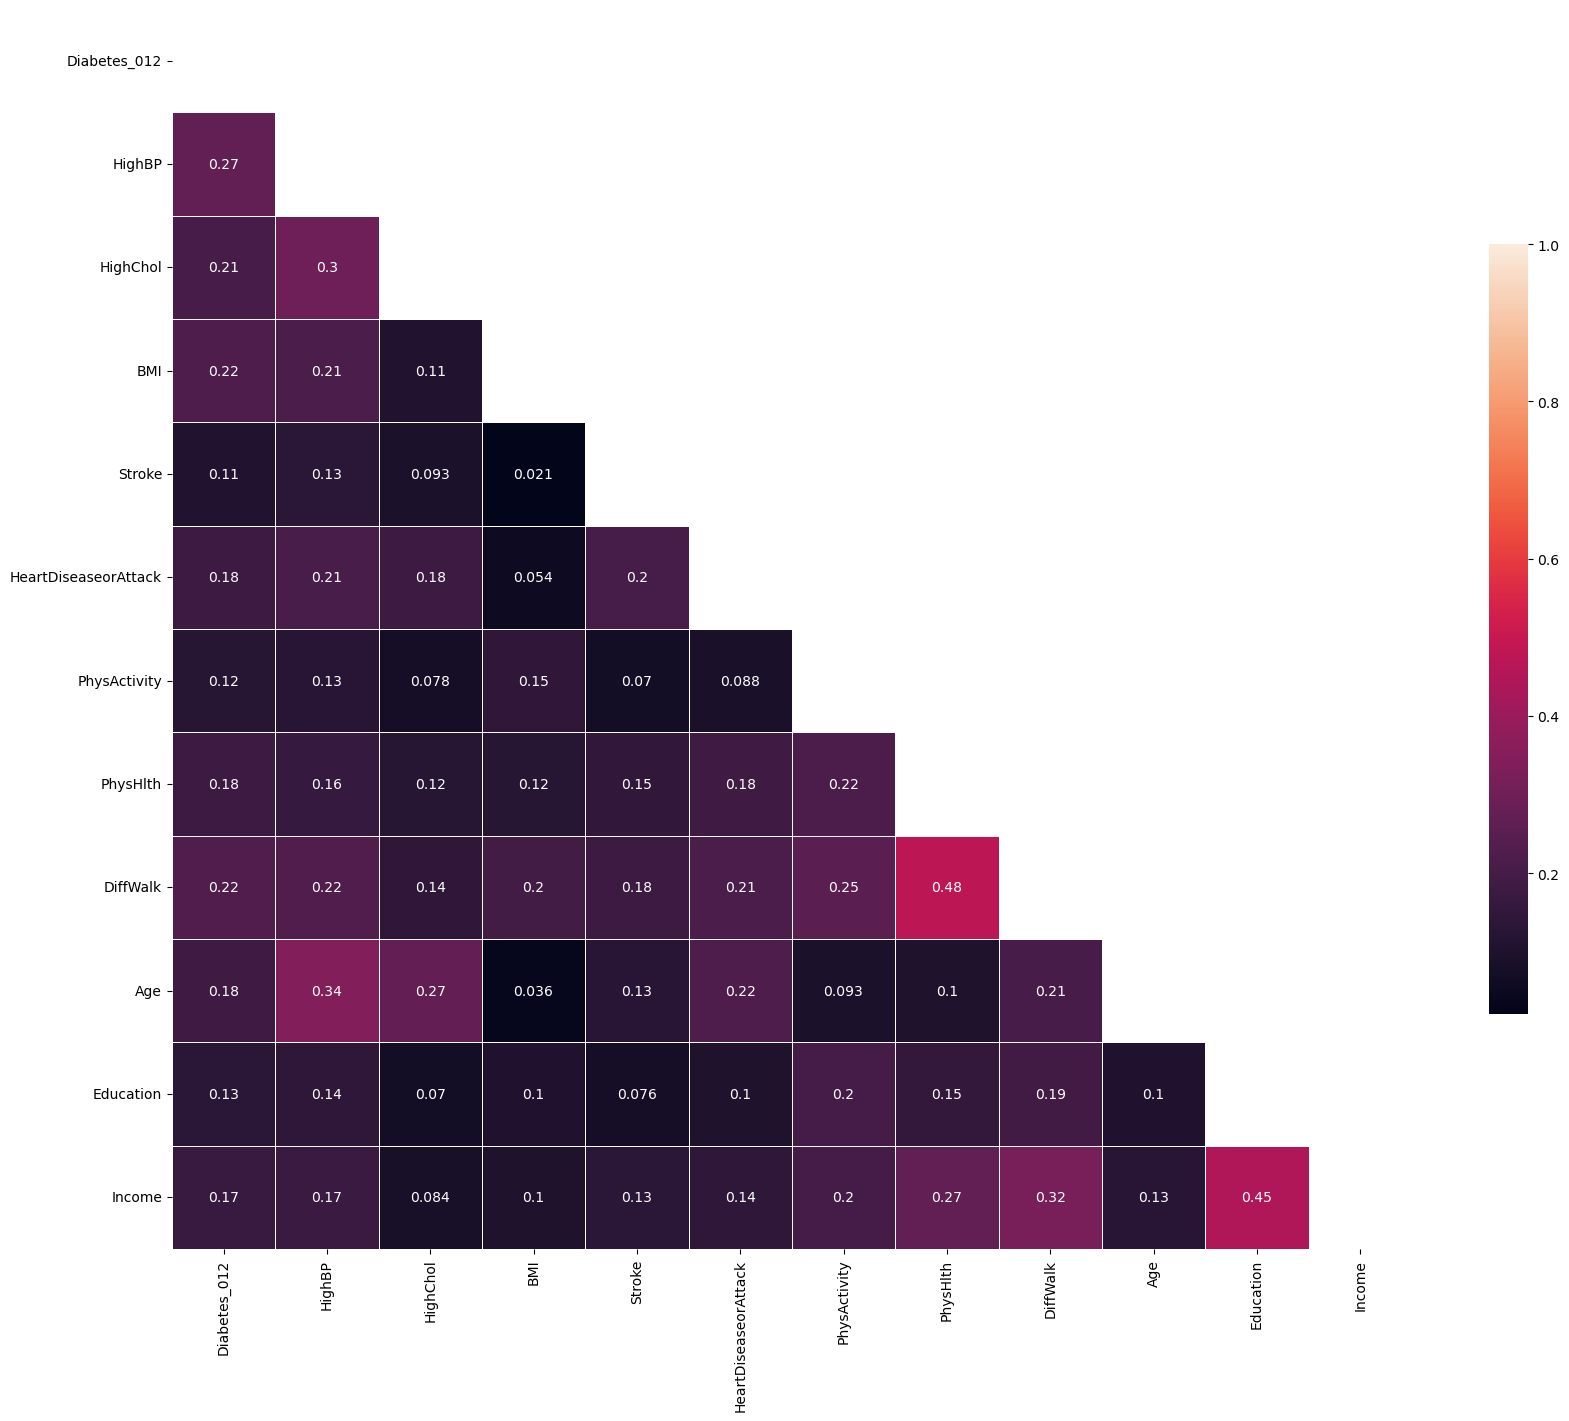

In [369]:
corr=np.abs(main_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Day 3

*Accuracy* = (TP + TN) / (TP + TN + FP + FN) ---> Likelyhood of a Result, regardless of type, being True

*Recall* = TP / (TP + FN) ---> Likelyhood of detecting Positive Cancer at all

*Precision* = TP / (TP + FP) ---> When given a Positive Diagnosis of Cancer, the likelyhood of it being True

| X    | 0   | 1   |
|------|-----|-----|
| 1    | FN  | TP  |
| 0    | TN  | FP  |


| Actual / Predicted | 1 (Positive) | 0 (Negative) |
|--------------------|--------------|--------------|
| 1 (Positive)       | TP           | FN           |
| 0 (Negative)       | FP           | TN           |


##### Where:

- **TP (True Positive)**: Correctly predicted positive case
- **FN (False Negative)**: Actual positive, but predicted negative
- **FP (False Positive)**: Actual negative, but predicted positive
- **TN (True Negative)**: Correctly predicted negative case

Worst Mistake, NON DETECTION, therefore go for Recall evaluation